<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment 2</h1></center>

<b>Siqi Wang</b>  
<b>Banner ID: B00976996</b>  


### 1. Task 1<a id='top'></a>

Your first task is doing some research on the dataset.

#### a) Subtask 1.a
Process or pre-process the heart disease data. Show the outputs of the pre-processing phase.

In [70]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [71]:
heart_data =pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
#check if all the columns have the correct data value ranges
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
heart_data=heart_data[heart_data['ca']!=4]
heart_data=heart_data[heart_data['thal']!=3]
heart_data.shape

(604, 14)

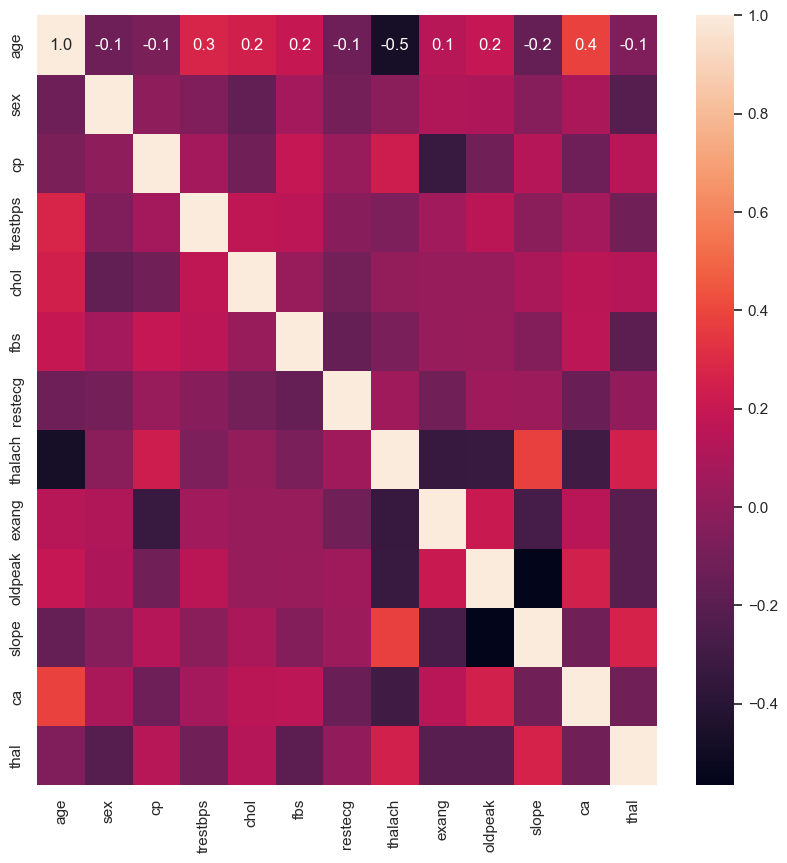

In [74]:
# draw Heatmap of correlation matrix between features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.drop('target', axis=1).corr(),annot=True,fmt='.1f')
plt.show()

In [75]:
#check missing values
missing_values = heart_data.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
#drop duplicates
print(heart_data.shape)
heart_data.drop_duplicates(inplace=True,keep="first")
print(heart_data.shape)


(604, 14)
(183, 14)


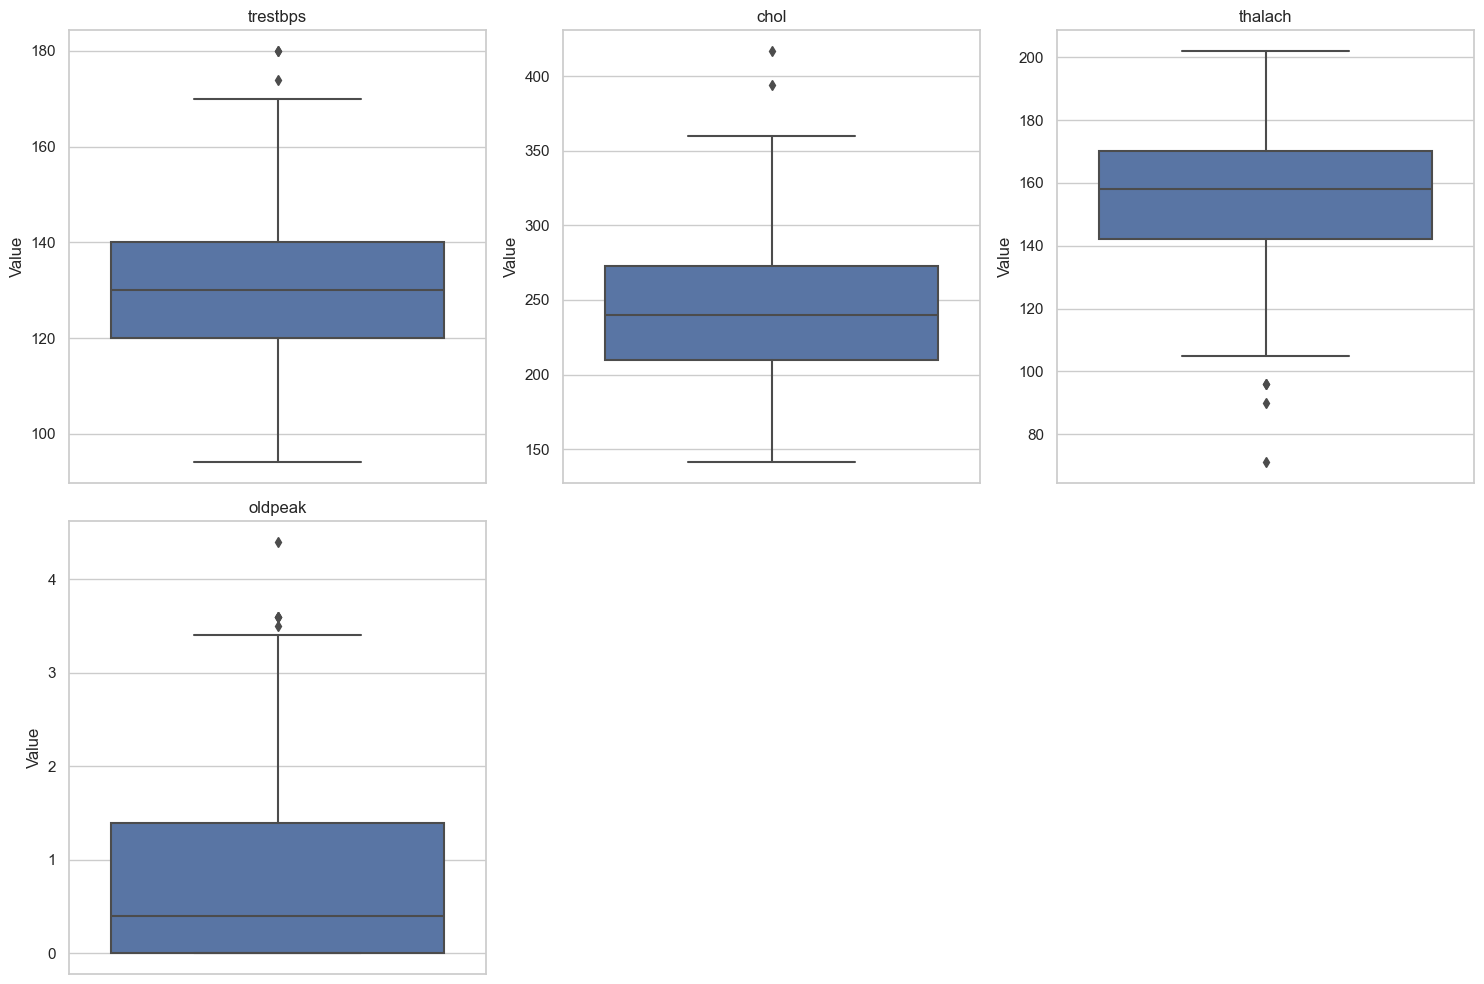

In [77]:
# find if outlier values are present in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_data[col])
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [78]:
heart_data[['trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,trestbps,chol,thalach,oldpeak
count,183.000000,183.000000,183.000000,183.000000
mean,129.972678,244.683060,153.256831,0.774317
std,16.293473,48.248192,22.768897,0.975776
min,94.000000,141.000000,71.000000,0.000000
25%,120.000000,209.500000,142.000000,0.000000
50%,130.000000,240.000000,158.000000,0.400000
75%,140.000000,273.000000,170.000000,1.400000
max,180.000000,417.000000,202.000000,4.400000


In [79]:
# Function to detect outliers based on IQR
print(heart_data.shape)
for column in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    
    Q1 = heart_data[column].quantile(0.25)
    Q3 = heart_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to keep only rows where the column value is within the bounds
    heart_data = heart_data[(heart_data[column] >= lower_bound) & (heart_data[column] <= upper_bound)]
print(heart_data.shape)


(183, 14)
(169, 14)


In [80]:
# test for any outliers left.
heart_data[['trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,trestbps,chol,thalach,oldpeak
count,169.000000,169.000000,169.000000,169.000000
mean,128.846154,242.573964,155.065089,0.671006
std,15.173599,44.730631,20.820989,0.830762
min,94.000000,141.000000,105.000000,0.000000
25%,120.000000,209.000000,143.000000,0.000000
50%,130.000000,239.000000,159.000000,0.200000
75%,138.000000,271.000000,171.000000,1.200000
max,170.000000,360.000000,202.000000,3.200000


In [81]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns that need scaling
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply standard scaling
scaler = StandardScaler()
heart_data[columns_to_scale] = scaler.fit_transform(heart_data[columns_to_scale])

# Display the first few rows of the scaled dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,0.901396,0,0,0.605067,1.153099,1,1,-2.363524,0,1.483753,1,3,2,0
5,0.484323,0,0,-1.906725,0.121665,0,0,-1.592785,0,0.397191,1,0,2,1
9,0.067250,1,0,-0.452529,0.973720,0,0,-1.881812,1,3.053231,1,2,2,0
10,1.839811,0,0,-1.113527,-2.098161,0,1,-1.448271,0,1.121566,1,0,2,1
12,-2.018116,0,1,-0.716929,-0.730389,0,1,1.779199,0,0.035004,2,0,2,1


In [82]:
# check if the dataset was std=1 and mean=0.
heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02
mean,-9.459888e-17,4.204395e-16,-2.312417e-16,5.675933e-16,3.153296e-17
std,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00
min,-2.539457e+00,-2.303324e+00,-2.277540e+00,-2.411695e+00,-8.100992e-01
25%,-8.711646e-01,-5.847290e-01,-7.528116e-01,-5.811897e-01,-8.100992e-01
50%,-3.701832e-02,7.626900e-02,-8.013716e-02,1.895493e-01,-5.686411e-01
75%,6.928596e-01,6.050674e-01,6.373823e-01,7.676036e-01,6.386496e-01
max,2.465420e+00,2.720261e+00,2.632983e+00,2.260910e+00,3.053231e+00


#### b) Subtask 1.b
Visually analyze the data after processing or pre-processing.

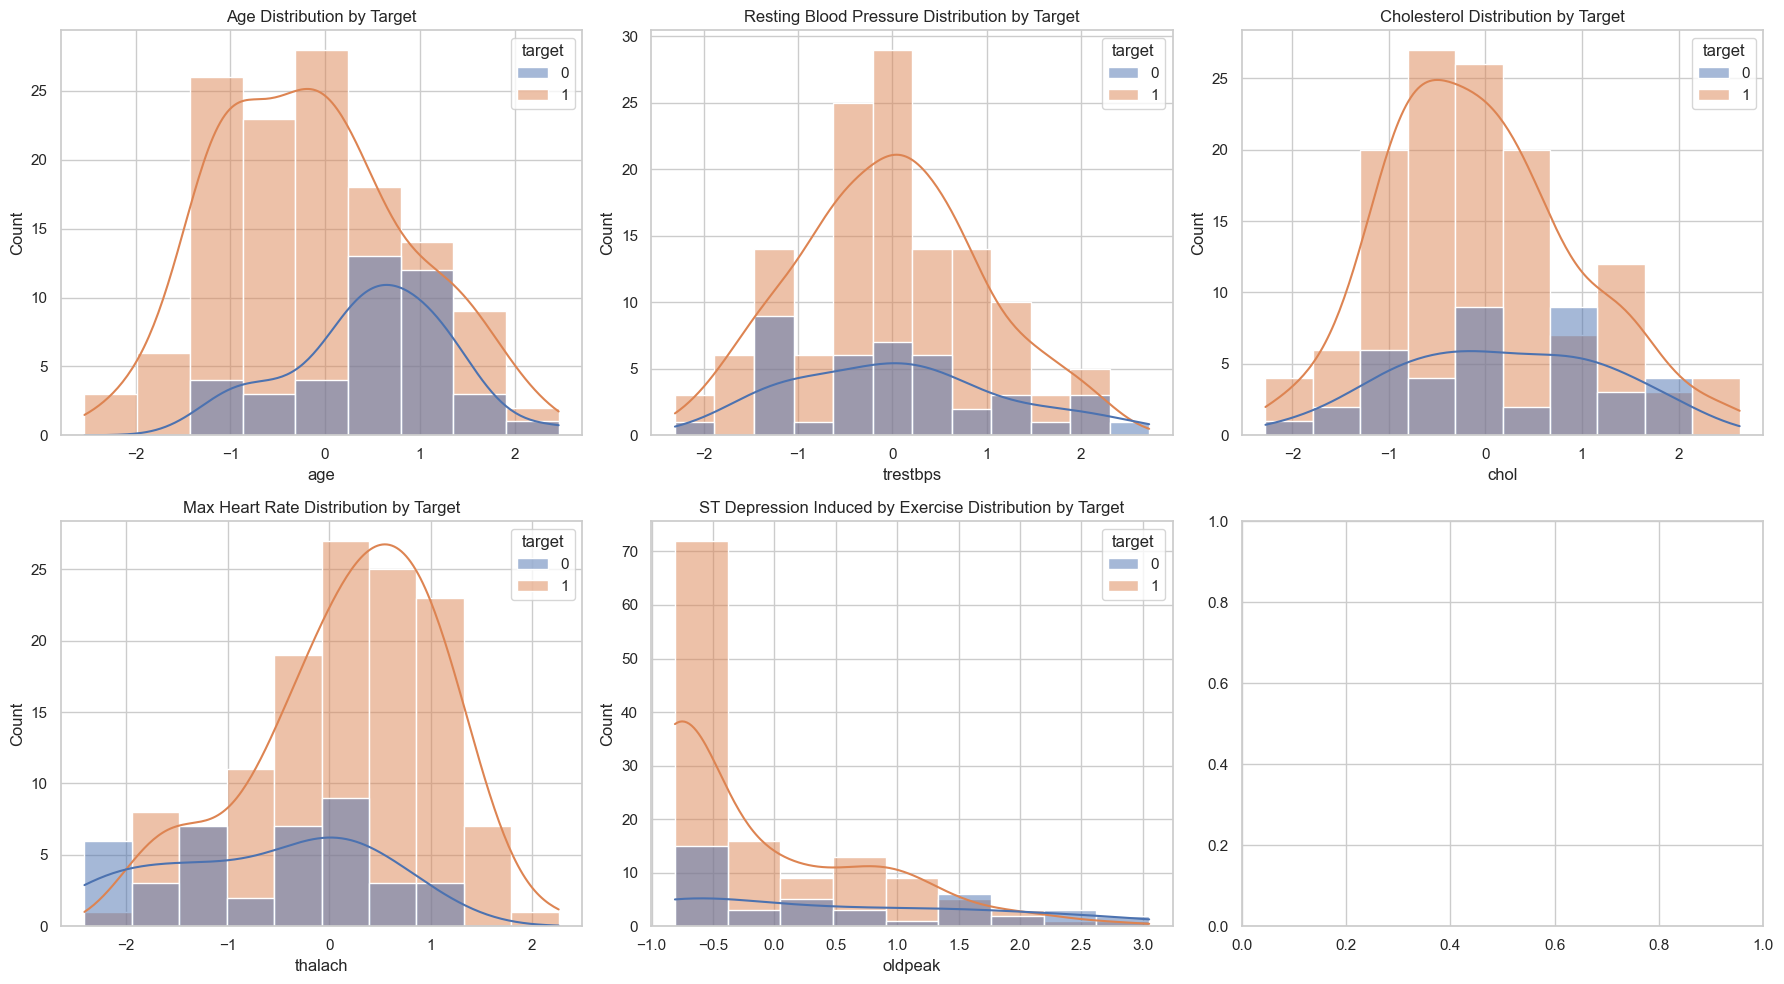

In [83]:
# Plot histograms for some features to visually analyze the data distribution
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(heart_data, x='age', hue='target', ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Age Distribution by Target')

sns.histplot(heart_data, x='trestbps', hue='target', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Resting Blood Pressure Distribution by Target')

sns.histplot(heart_data, x='chol', hue='target', ax=axs[0, 2], kde=True)
axs[0, 2].set_title('Cholesterol Distribution by Target')

sns.histplot(heart_data, x='thalach', hue='target', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Max Heart Rate Distribution by Target')

sns.histplot(heart_data, x='oldpeak', hue='target', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('ST Depression Induced by Exercise Distribution by Target')

plt.tight_layout()
plt.show()

From the charts provided, distinct physiological characteristics related to heart health exhibit clear variations between two groups: those without heart disease and those with heart disease. Specifically, individuals with heart disease tend to fall within a slightly younger age distribution. Their resting blood pressure is comparable to those without heart disease, but with a slightly elevated median. Additionally, the cholesterol level distribution for the heart disease group is slightly higher around the median. Most notably, the maximum heart rate for individuals with heart disease is significantly higher than those without, potentially indicating a more responsive heart or higher physical activity levels in this group. In terms of ST Depression induced by exercise, individuals with heart disease often exhibit lower values, suggesting their hearts may have a stronger adaptive capability under exercise stress. 

#### c) Subtask 1.c
Explain the method(s) you chose for processing/preprocessing and provide a descriptive analysis to justify your choice. You can resort [1(b)] to justify.

Why I chose these preprocessing methods:
1.The data was already in numerical format, so further encoding was not required.
2.There were no missing values, so there was no need to fill or remove any records.
3.There were many duplicate records, so I removed them.
4.Through the box plot, we can know that there are some outlier values in data. So we use IQR to drop them. 
5.Why do standarlization: Algorithms like logistic regression or support vector machines are sensitive to feature scales. Features like chol might have much larger numeric values than binary features like sex. Without standardization, features with larger scales could disproportionately influence the model.

### 2. Task 2<a id='top'></a>

#### a) Subtask 2.a
Apply Naive Bayes classifier on your dataset.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into training and testing sets
x = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

#### b) Subtask 2.b
Evaluate the performance for disease classification.

In [85]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Classification Report:\n {}'.format(classification_rep))


Accuracy:  0.7941176470588235
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.81      0.92      0.86        24

    accuracy                           0.79        34
   macro avg       0.76      0.71      0.73        34
weighted avg       0.79      0.79      0.78        34



From the classification report metrics, we can find that the model has a good performance on predicting the disease.

### 3. Task 3<a id='top'></a>

#### a) Subtask 3.a
Repeat task [2] by applying logistic regression with gradient descent.

In [86]:
from sklearn.linear_model import LogisticRegression

# Apply Logistic Regression with gradient descent (default solver 'lbfgs' performs gradient descent)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print('Accuracy: ', accuracy_lr)
print('Classification Report:\n {}'.format(classification_rep_lr))
print("Weights (Coefficients) of Logistic Regression:", log_reg.coef_)

Accuracy:  0.8529411764705882
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.83      1.00      0.91        24

    accuracy                           0.85        34
   macro avg       0.91      0.75      0.79        34
weighted avg       0.88      0.85      0.84        34

Weights (Coefficients) of Logistic Regression: [[-0.18195957 -0.76920138  0.48689346  0.01667382 -0.15107177  0.20572971
   0.03595492  0.33338725 -0.49253248  0.07627524  0.33098105 -1.12698463
   0.25820622]]


#### b) Subtask 3.b
Compare the performance of task 3[a] with batch gradient descent, minibatch gradient descent, and stochastic gradient descent.

In [87]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import time

def train(method_name, X_train, y_train, X_test, y_test, batch_size=None, tol=1e-4, max_iters=100000):
    clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.1, max_iter=1, tol=None)
    previous_loss = float('inf')
    no_improvement_iters = 0

    start_time = time.time()

    for _ in range(max_iters):
        if method_name == "full_gradient_descent":
            clf.partial_fit(X_train, y_train, classes=[0, 1])
        elif method_name == "stochastic_gradient_descent":
            for i in range(X_train.shape[0]):
                clf.partial_fit(X_train[i].reshape(1, -1), y_train.iloc[i].reshape(-1), classes=[0, 1])
        elif method_name == "mini_batch_gradient_descent":
            indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
            clf.partial_fit(X_train[indices], y_train.iloc[indices], classes=[0, 1])

        predictions = clf.predict_proba(X_test)[:, 1]
        current_loss = log_loss(y_test, predictions)
        if abs(previous_loss - current_loss) < tol:
            no_improvement_iters += 1
            # Stop if no improvement for 5 consecutive iterations
            if no_improvement_iters > 5:
                break
        else:
            no_improvement_iters = 0

        previous_loss = current_loss

    end_time = time.time()
    accuracy = np.mean(clf.predict(X_test) == y_test)
    print(f"{method_name} - Log Loss: {current_loss}, Accuracy: {accuracy}, Time: {end_time - start_time} seconds")

train("stochastic_gradient_descent", X_train_scaled, y_train, X_test_scaled, y_test)
train("mini_batch_gradient_descent", X_train_scaled, y_train, X_test_scaled, y_test, batch_size=16)
train("full_gradient_descent", X_train_scaled, y_train, X_test_scaled, y_test)


stochastic_gradient_descent - Log Loss: 0.4117735719943055, Accuracy: 0.8235294117647058, Time: 2.281209707260132 seconds
mini_batch_gradient_descent - Log Loss: 0.3229939753487928, Accuracy: 0.8235294117647058, Time: 273.0593841075897 seconds
full_gradient_descent - Log Loss: 0.49864232404918013, Accuracy: 0.8529411764705882, Time: 789.3690910339355 seconds


#### c) Subtask 2.c
Display training, validation, and test loss over 30 epochs.

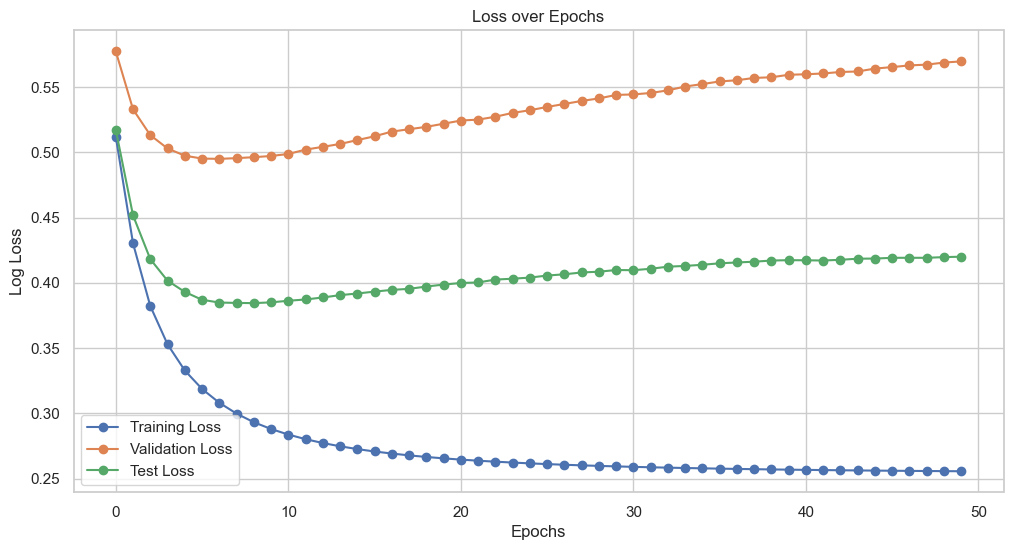

In [88]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

# Splitting the training data further to get a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)  

# Training the model over 30 epochs and capturing training and validation losses
train_losses = []
val_losses = []
test_losses = []
epochs = 50
# Using SGDClassifier with Gradient Descent
model = SGDClassifier(loss="log_loss", learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True)

for epoch in range(epochs):
    
    model.fit(X_train, y_train)  

    train_loss = log_loss(y_train, model.predict_proba(X_train))
    val_loss = log_loss(y_val, model.predict_proba(X_val))
    test_loss = log_loss(y_test, model.predict_proba(X_test))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_losses, '-o', label='Training Loss')
plt.plot(range(epochs), val_losses, '-o', label='Validation Loss')
plt.plot(range(epochs), test_losses, '-o', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()


The loss for both the validation set and test set has fully converged around 10 epochs. However, the loss for the training set continues to decrease. This indicates overfitting starting after 10 epochs. The model's generalization capability has not improved further.

### 4. Task 4<a id='top'></a>

#### a) Subtask 4.a
Which evaluation metric did you use? Explain your reasoning.

Precision, Recall, F1-Score: These provide a more detailed performance breakdown for each class. Precision looks at the correctness of positive predictions, recall focuses on the coverage of actual positive instances, and the F1-score offers a balance between precision and recall.

Reasoning:

Precision, recall, and F1-score provide a comprehensive view of the model's performance across different facets. For a medical dataset like this, both false negatives (misclassifying a heart disease case) and false positives (incorrectly predicting heart disease when there isn't any) have significant implications. Precision and recall help in understanding these aspects.


#### b) Subtask 4.b
Which model provided the highest score? Explain the reasons.

The Naive Bayes classifier 
The Naive Bayes classifier has a slightly higher accuracy than the Logistic Regression model.
In terms of precision, recall, and F1-score, both models have similar performances. The slight variations can be attributed to the underlying assumptions and mechanisms of the models.

### 5. Task 5<a id='top'></a>

![Handwriting](./Assignment2_handwriting.png "Handwriting")

References:

ScholarWorks at CSUSB. (2023). Retrieved from https://scholarworks.lib.csusb.edu/cgi/viewcontent.cgi?article=2924&context=etd

scikit-learn developers. (n.d.). Stochastic Gradient Descent. Retrieved from https://scikit-learn.org/stable/modules/sgd.html

TensorFlow developers. (n.d.). Sequential Model. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

TensorFlow developers. (n.d.). Dense Layer. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

TensorFlow developers. (n.d.). Model Compilation. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile